# <center> ***Fuzzy Inference System***

In this project, we are going to look at a fuzzy system that determines how much you should tip in a restuarant given tow inputs:
* *Food Quality*
* *Service Qulity*

As any other fuzzy inference system, we are going to break this problem up to 3 distinct sections:
1. $Fuzzification$
2. $Inference$
3. $Defuzzification$

# 1) ***Fuzzification***

> We have 2 crisp inputs into the system: **Food and Service Quality**
<br> These inputs can range from $0$ to $10$.

We can think of these numbers as a feedback in a restuarant about the quality of their food and service.
<br> Given these feedbacks, a costumer wants to know how much should he tip.

To fuzzify these tow values, we use the linguistic variables, those are the human interpretable adjectives,
<br> and their respective membership functions.

These variables are:
>* For Food Quality =    ${rancid, fine, delicious}$
* For Service Quality = ${poor, good, excellent}$

In [10]:
import numpy as np
from matplotlib import pyplot as plt
from ipywidgets import interact
import scipy.integrate as integrate
import warnings

In [11]:
class Point:
  def __init__(self, x, y):
    self.x = x
    self.y = y

class Line:
  def __init__(self, p1, p2):
    self.m = (p2.y - p1.y) / (p2.x - p1.x)
    self.b = p1.y - (self.m * p1.x)

  def calculate_y(self, x):
    return self.m * x + self.b

  def calculate_x(self, y):
    return (y - self.b) / self.m

In [12]:
class FoodQuality:
  def __init__(self, quality):
    self.quality = quality

  def rancid(self):
    if 0 <= self.quality <= 2:
      return 1.
    elif 2 <= self.quality <= 4:
      line = Line(Point(2., 1.), Point(4., 0.))
      return line.calculate_y(self.quality)
    else:
      return 0.

  def fine(self):
    if 2 <= self.quality <= 4:
      line = Line(Point(2., 0.), Point(4., 1.))
      return line.calculate_y(self.quality)
    elif 4 <= self.quality <= 6:
      return 1.
    elif 6 <= self.quality <= 8:
      line = Line(Point(6., 1.), Point(8., 0.))
      return line.calculate_y(self.quality)
    else:
      return 0.

  def delicious(self):
      if 6 <= self.quality <= 8:
          line = Line(Point(6., 0.), Point(8., 1.))
          return line.calculate_y(self.quality)
      elif 8 <= self.quality <= 10:
          return 1.
      else:
          return 0.

In [13]:
class ServiceQuality:
  def __init__(self, quality):
    self.quality = quality

  @staticmethod
  def bell_func(x, mean, std=1.5):
    return np.exp(- (x - mean) ** 2 / (2 * std ** 2))

  def poor(self):
    return self.bell_func(self.quality, mean=0.)

  def good(self):
    return self.bell_func(self.quality, mean=5.)

  def excellent(self):
    return self.bell_func(self.quality, mean=10.)

So we have these membership functions for Food Quality and Service Quality:

In [14]:
def plot_food_quality(q=None):
  quality = np.linspace(0, 10, num=400)

  membership = [FoodQuality(m).rancid() for m in quality]
  plt.plot(quality, membership, color='red')

  membership = [FoodQuality(m).fine() for m in quality]
  plt.plot(quality, membership, color='blue')

  membership = [FoodQuality(m).delicious() for m in quality]
  plt.plot(quality, membership, color='green')

  plt.xlabel("Food Quality")
  plt.ylabel("Degree Membership")
  plt.legend(["rancid", "fine", "delicious"])
  plt.xticks(np.arange(0, 11, step=1))
  plt.yticks(np.arange(0, 1.1, step=0.1))

  if q is not None:
    memberships = {}
    memberships['rancid'] = FoodQuality(q).rancid()
    memberships['fine'] = FoodQuality(q).fine()
    memberships['delicious'] = FoodQuality(q).delicious()

    plt.axvline(x=q, color='purple', linestyle='--')
    plt.plot(q, memberships['rancid'], 'ro', color='red')
    plt.plot(q, memberships['fine'], 'ro', color='blue')
    plt.plot(q, memberships['delicious'], 'ro', color='green')

    plt.show()
    return memberships

  plt.show()

In [15]:
def plot_service_quality(q=None):
  quality = np.linspace(0, 10, num=400)

  membership = [ServiceQuality(m).poor() for m in quality]
  plt.plot(quality, membership, color='red')

  membership = [ServiceQuality(m).good() for m in quality]
  plt.plot(quality, membership, color='blue')

  membership = [ServiceQuality(m).excellent() for m in quality]
  plt.plot(quality, membership, color='green')

  plt.xlabel("Service Quality")
  plt.ylabel("Degree Membership")
  plt.legend(["poor", "good", "excellent"])
  plt.xticks(np.arange(0, 11, step=1))
  plt.yticks(np.arange(0, 1.1, step=0.1))

  if q is not None:
    memberships = {}
    memberships['poor'] = ServiceQuality(q).poor()
    memberships['good'] = ServiceQuality(q).good()
    memberships['excellent'] = ServiceQuality(q).excellent()

    plt.axvline(x=q, color='purple', linestyle='--')
    plt.plot(q, memberships['poor'], 'ro', color='red')
    plt.plot(q, memberships['good'], 'ro', color='blue')
    plt.plot(q, memberships['excellent'], 'ro', color='green')

    plt.show()
    return memberships

  plt.show()

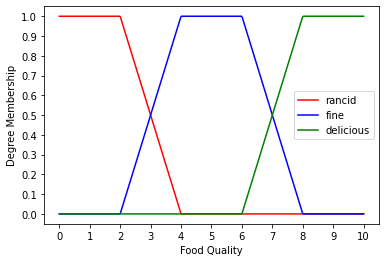

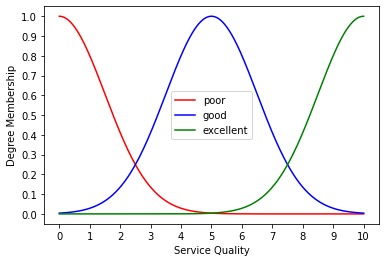

In [16]:
plot_food_quality()
plot_service_quality()

Now given our crisp inputs, we can see the fuzzified value of them accordind to membership functions:

In [17]:
@interact(quality=(0.0,10.0,0.01))
def fuzzify_food_quality(quality):
  memberships = plot_food_quality(quality)
  print("Membership of Food Quality = %g for:" %quality)
  print("rancid => %.2f" %memberships['rancid'])
  print("fine => %.2f" %memberships['fine'])
  print("delicious => %.2f" %memberships['delicious'])

interactive(children=(FloatSlider(value=5.0, description='quality', max=10.0, step=0.01), Output()), _dom_clas…

In [18]:
@interact(quality=(0.0,10.0,0.01))
def fuzzify_service_quality(quality):
  memberships = plot_service_quality(quality)
  print("Membership of Service Quality = %g for: " %quality)
  print("poor => %.2f" %memberships['poor'])
  print("good => %.2f" %memberships['good'])
  print("excellent => %.2f" %memberships['excellent'])

interactive(children=(FloatSlider(value=5.0, description='quality', max=10.0, step=0.01), Output()), _dom_clas…

# 2) ***Inference***

In this step, we use some logical statements, so called **RULES**, to infer what the output should be.

We consider these 3 rules:
> 1. If $service$ is $poor$ or $food$ is $rancid$ then $tip$ is $low$
> 2. If $service$ is $good$ then $tip$ is $average$
> 3. If $service$ is $excellent$ or $food$ is $delicious$ then $tip$ is $high$

In [19]:
def infer(food_memberships, service_memberships):
  tip_memberships = {}

  # Rule 1 : If service is poor or food is rancid then tip is low
  tip_memberships['low'] = max(service_memberships['poor'], food_memberships['rancid'])

  # Rule 2 : If service is good then tip is average
  tip_memberships['average'] = service_memberships['good']

  # Rule 3 : If service is excellent or food is delicious then tip is high
  tip_memberships['high'] = max(service_memberships['excellent'], food_memberships['delicious'])

  return tip_memberships

# 3) ***Defuzzification***

Now that we have our fuzzy variables indicating how much tip we should leave (what degree of low, avarage and high should the tip be),
<br>we have to get them back into a crisp tip value.

So we have to consider a new membership function for tip:

In [20]:
class TipPercentage:
  class Triangle:
    def __init__(self, x1, x2, x3):
      self.p1 = Point(x1 * 1., 0.)
      self.p2 = Point(x2 * 1., 1.)
      self.p3 = Point(x3 * 1., 0.)

      self.l1 = Line(self.p1, self.p2)
      self.l2 = Line(self.p2, self.p3)

    def compute_membership(self, x):
      if not self.p1.x <= x <= self.p3.x:
        return 0.
      if self.p1.x <= x <= self.p2.x:
        return self.l1.calculate_y(x)
      if self.p2.x <= x <= self.p3.x:
        return self.l2.calculate_y(x)

    def compute_boundaries(self, y):
      x_min = self.l1.calculate_x(y)
      x_max = self.l2.calculate_x(y)
      return x_min, x_max

  def __init__(self):
    self.low_triangle = self.Triangle(0., 5., 15.)
    self.average_triangle = self.Triangle(5., 15., 25.)
    self.high_triangle = self.Triangle(15., 25., 30.)

  def res_func(self, memberships, x):
    low_cut = memberships['low']
    low_belonging = self.low_triangle.compute_membership(x)
    low_degree = min(low_cut, low_belonging)

    average_cut = memberships['average']
    average_belonging = self.average_triangle.compute_membership(x)
    average_degree = min(average_cut, average_belonging)

    high_cut = memberships['high']
    high_belonging = self.high_triangle.compute_membership(x)
    high_degree = min(high_cut, high_belonging)

    return max(low_degree, average_degree, high_degree)

  def defuzzify(self, memberships):
    def numerator(x):
      return x * self.res_func(memberships, x)

    def denominator(x):
      return self.res_func(memberships, x)

    warnings.filterwarnings('ignore')
    s1 = integrate.quad(lambda x: numerator(x), 0., 30.)[0]
    s2 = integrate.quad(lambda x: denominator(x), 0., 30.)[0]
    
    try:
      z = s1 / s2
    except ZeroDivisionError:
      z = 0

    return z

In [21]:
def plot_tip_percentage(m=None):
  tp = np.linspace(0, 30, num=1000)
  tip_percentage = TipPercentage()

  membership = [tip_percentage.low_triangle.compute_membership(t) for t in tp]
  plt.plot(tp, membership, color='red')

  membership = [tip_percentage.average_triangle.compute_membership(t) for t in tp]
  plt.plot(tp, membership, color='blue')

  membership = [tip_percentage.high_triangle.compute_membership(t) for t in tp]
  plt.plot(tp, membership, color='green')

  plt.xlabel("Tip Percentage")
  plt.ylabel("Degree Membership")
  plt.legend(["low", "average", "high"])
  plt.xticks(np.arange(0, 31, step=5))
  plt.yticks(np.arange(0, 1.1, step=0.1))

  if m is not None:
    low_degree = m['low']
    average_degree = m['average']
    high_degree = m['high']

    low_xmin, low_xmax = tip_percentage.low_triangle.compute_boundaries(low_degree)
    average_xmin, average_xmax = tip_percentage.average_triangle.compute_boundaries(average_degree)
    high_xmin, high_xmax = tip_percentage.high_triangle.compute_boundaries(high_degree)

    plt.plot((low_xmin, low_xmax), (low_degree, low_degree), 'r--')
    plt.plot((average_xmin, average_xmax), (average_degree, average_degree), 'b--')
    plt.plot((high_xmin, high_xmax), (high_degree, high_degree), 'g--')

  plt.show()

Here is the membership functions for tip percentage. According to the degree of the tip, we have 3 fuzzy sets: ${low, average, high}$

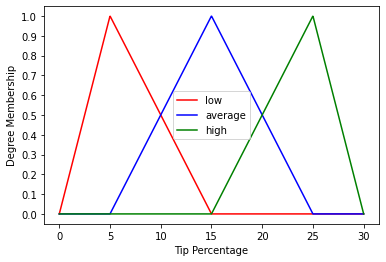

In [22]:
plot_tip_percentage()

We should fill into the membership functions respect to the degree membership we calculated in inference phase.
<br> For example, consider the degree membership of each membership function as below:
> low = 0.2
> <br> average = 0.7
> <br> high = 0.4

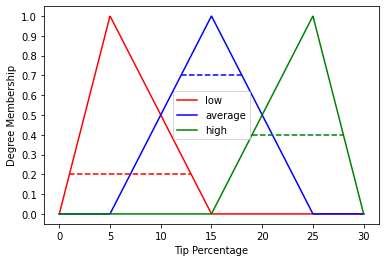

In [23]:
plot_tip_percentage({'low': 0.2, 'average': 0.7, 'high': 0.4})

# ***Putting it all together***

Now that we have completed all 3 phases of our fuzzy infrence system, we use them to counclude the final tip percentage:

In [24]:
def make_output(fq , sq):
  # Fuzzify crisp input values
  f_memberships = plot_food_quality(fq)
  print()
  s_memberships = plot_service_quality(sq)
  print()

  # Inference from rules
  t_memberships = infer(f_memberships, s_memberships)

  # Defuzzification using centriod method
  plot_tip_percentage(t_memberships)
  print()
  z = TipPercentage().defuzzify(t_memberships)
  return z

**By selecting a crisp value for food and service quality using the slider, the system inferes how much you should tip.**

In [25]:
@interact(food=(0.0,10.0,0.01), service=(0.0,10.0,0.01))
def make_input(food=5., service=5.):
  duffizified_value = make_output(food, service)
  print("Respect to chosen inputs, the defuzzified crisp value for the tip percentage is : %.2f%%" %duffizified_value)

interactive(children=(FloatSlider(value=5.0, description='food', max=10.0, step=0.01), FloatSlider(value=5.0, …